# Portuguese Banking Institution

# About the Dataset

#### The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

# Question 1

In [47]:
# Library Used
import pandas as pd
import matplotlib.pyplot as plt
import numpy as py
import seaborn as sns

In [48]:
df = pd.read_csv("bank-full.csv")

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


![](https://media1.tenor.com/images/f3f408507e6f91d8c6a7f43012989c9d/tenor.gif?itemid=5005614f)

## Insight 1

In [50]:
# Values converted to percentage
df_Target = df['Target'].value_counts(normalize = True)
print(f'People divided by target in percentage: \n{df_Target}')

People divided by target in percentage: 
no     0.883015
yes    0.116985
Name: Target, dtype: float64


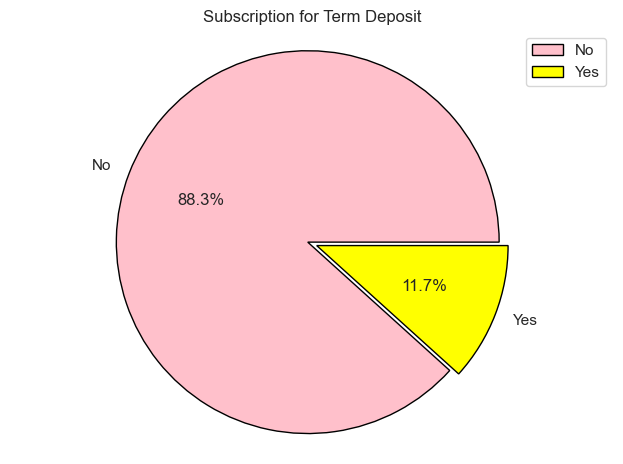

In [51]:
# Pie chart using matplotlib
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
plt.pie(df_Target, 
        labels = ['No','Yes'],
        colors = ['pink', 'yellow'],
        autopct = '%0.1f%%',
        explode = [0, 0.05],
        wedgeprops = wp
      );
plt.title("Subscription for Term Deposit")
plt.legend(loc = 'upper right')
plt.axis('equal')
plt.tight_layout()


### Overall, out of more than 45000 existing customers the company has received around 12% customer subscribing the product the new product. Remaining 88.3% feels not to buy them. It is not a very good figure to present out of a huge existing client base. There must be neccessary steps taken to improve the figure. There could be possiblity that clients are dissatisfied with the current product portfolio or even poor market campaigns too.

## Insight 2

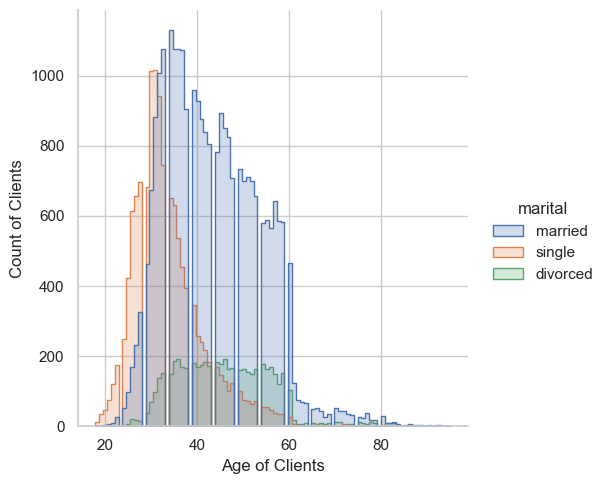

In [52]:
sns.displot(df, x="age", hue="marital", element="step").set(xlabel="Age of Clients",ylabel="Count of Clients")

### Currently, we have a huge customer base for both single and married status of aged late twenties and early thirties. Overall, married client base takes most of the area of the bank. Divorce marital status remain as low in number. However, is this trend similar for the subscription of our new product(term deposit)? Let us look at the below insight.

## Insight 3

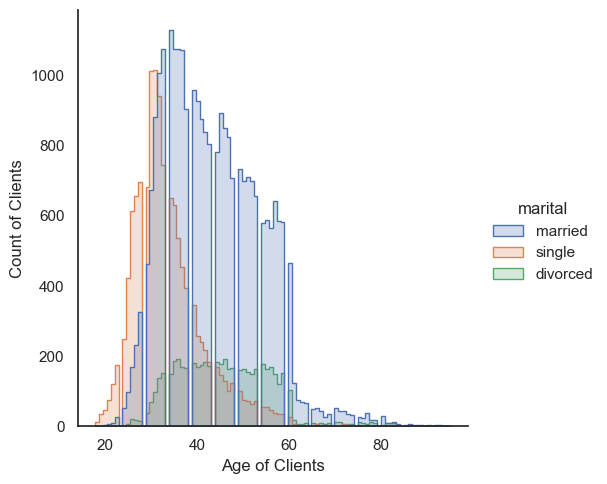

In [53]:
df_target = df[(df["Target"]=="yes")]
sns.set_theme(style="white")
sns.displot(df, x="age", hue="marital", element="step").set(xlabel="Age of Clients",ylabel="Count of Clients")

### If we look for the clients who have subscribed our new product, which matches the previous graph. However, there is a slight difference in the age of people. People who have subscribed the term deposits tend to be higher in late thirties. Although there is no much difference but one can easily tell that this effect could be the preference they have on investments like equity market or mutual funds. Usually, in reality they do not prefer deposits due to less returns.


## Insight 4

[Text(0.5, 0, 'Mode of Contact'), Text(0, 0.5, 'Count of Clients')]

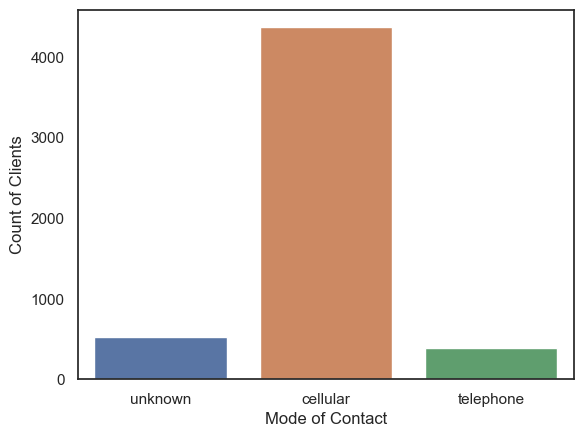

In [54]:
sns.countplot(x=df_target["contact"]).set(xlabel="Mode of Contact",ylabel="Count of Clients")

### We have received most of our campaigns successful for the new product through the cellular mode of contact. Probably, the next campaign also must be done through only cellular to reduce the time consumed in telephone and other source. Comapany can also bring in digital ads as it is becoming famous nowaday, that can cover exisiting as well as the new customers too. 

![](https://media.tenor.com/sNBq6nbRWpEAAAAd/calling-call.gif)

## Insight 5

Text(0.5, 1.0, 'Monthly Wise Duration Over Contact Types')

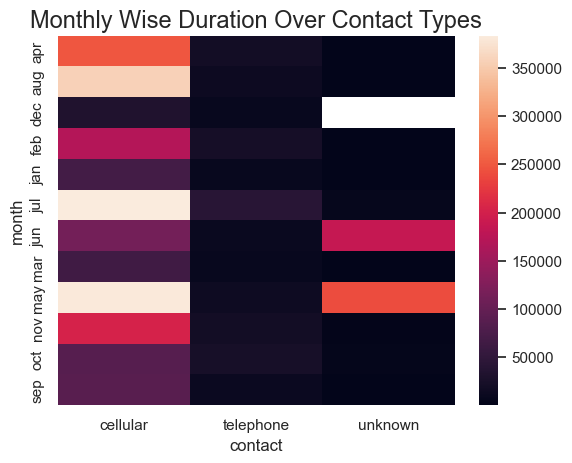

In [55]:
df_agg = df_target.groupby(['month', 'contact'])["duration"].sum().reset_index()
df_pivoted = df_agg.pivot('month', 'contact', 'duration')

sns.heatmap(df_pivoted).set_title("Monthly Wise Duration Over Contact Types",size = 17)

### Overall, the month of May, July and August, the campaign duration times was too high. Campaign timings could have been more at the time of December where the clients usually are free(winter vacation). Does that mean that the more the duration spent with client, the better chance of acquiring them to try the new product? The below insight might explain this....

## Insight 6

In [56]:
df_agg = df.groupby(['contact'])["duration"].mean().reset_index()

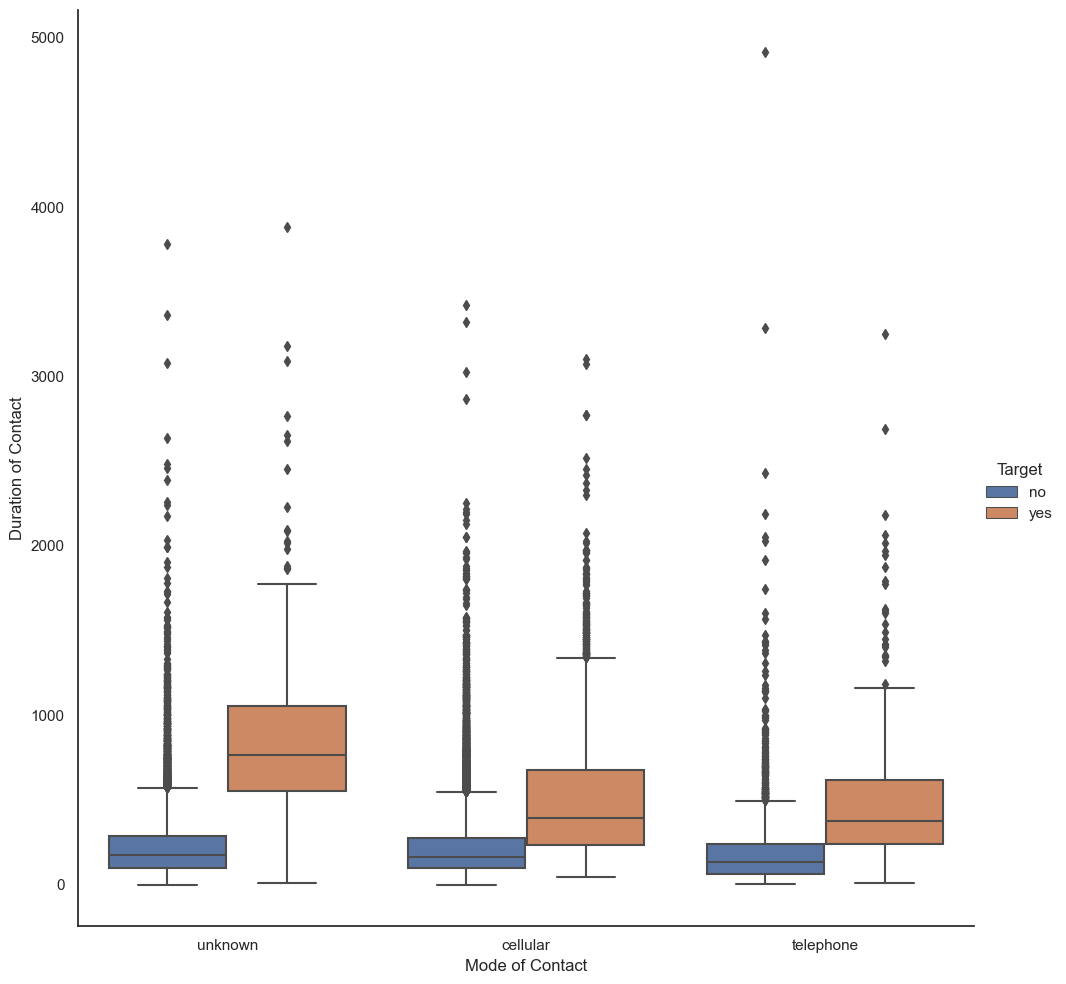

In [57]:
sns.catplot(data=df, x="contact", y="duration", hue="Target", kind="box",height=10).set(xlabel="Mode of Contact",ylabel="Duration of Contact")

### On this box chart we can find that the maximum duration spent on a customer is using cellular contact while ignoring the unknown. As per the condition of previous insight, the customers who spend more duration on call has accepted our new product. This is the same in the case for the rest of the contact types too. Trying to engage the clients for long talk might improve the acquisition rate. 

![](https://media3.giphy.com/media/l41lVsYDBC0UVQJCE/giphy.gif )

## Insight 7(Has the clients who have subscribed previous new product has taken over termed deposit?) 

[Text(0, 0.5, 'Outcome From Previous Campaign'),
 Text(0.5, 0, 'Count of Existing Clients')]

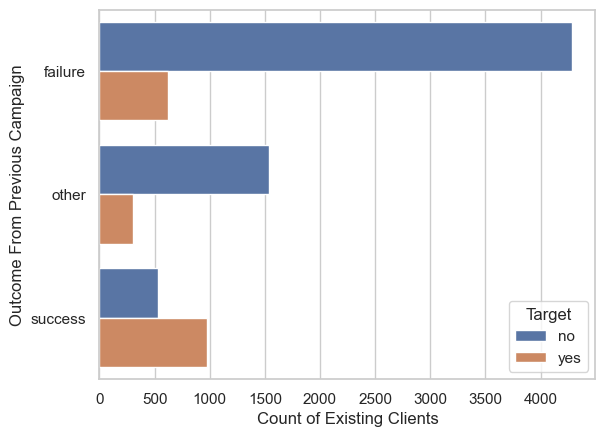

In [58]:
sns.set_theme(style="whitegrid")
df_poutcome = df[(df["poutcome"]=="success")|(df["poutcome"]=="failure")|(df["poutcome"]=="other")]
sns.countplot(data=df_poutcome, y="poutcome", hue="Target").set(ylabel="Outcome From Previous Campaign",xlabel="Count of Existing Clients")

### Hmmm, most of people who was successful in last marketing campaign have been successful in the current marketing campaign of term deposits. This shows that previous new product could have worked good for them but still the maketing campaign is not effective. The effective part is just minimal but the ineffective part is high for both previous as well as current marketing campaign.

### The new marketing campaign was not very successful to bring the previous failures. This shows that the marketing campaign no such improvement to acquire a lot of customers. If this trend continues, at one point of time we can loose the current succesful for our upcoming new products too. 

### There can be chances that previous services offered by bank could have been cumbersome for the clients. Through the bad image of previous outcome, they tend to avoid the new products.

## Insight 8

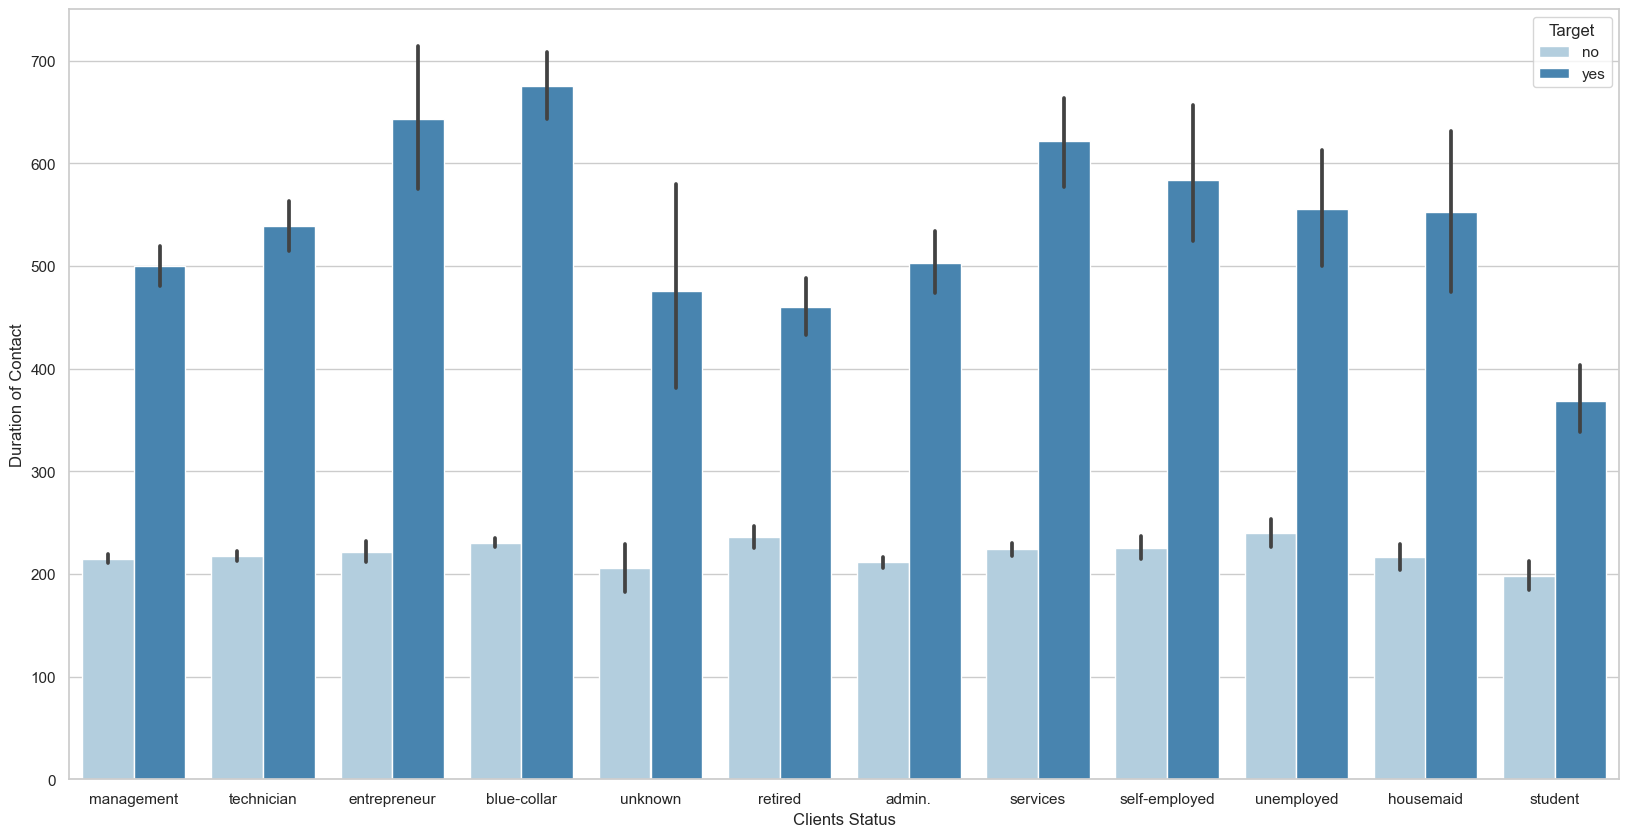

In [59]:
sns.barplot(x = 'job',y ='duration', hue ='Target',data = df,palette = "Blues").set(xlabel="Clients Status",ylabel="Duration of Contact")
plt.gcf().set_size_inches(20, 10)

### As previously we have declared that the more time we spend with the clients, there is a huge chance of accepting our product. As per the job status we can find that clients with jobs that are blue-collar, enterpreneur and services have given more duration for the current marketing campaign. Probably we must start focusing on other job types too. We have a great potential on self-employed and management roles, so that we can target them more on our upcoming products too.

### It is good to not leave this pace of more duration, however we need to rectify the errors we have committed for the rejection of our new product among the job types. It is good to produce campaigns that specialises for specific job types, so for the upcoming new product campaigns more new clients can be brought on the specific role.

![](https://cdn.dribbble.com/users/1392339/screenshots/3920433/lets-play-the-game.gif)

In [60]:
# Dropping null values
df = df.dropna()
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [61]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [63]:
# Creating dataframe for a category columns
da = df.select_dtypes(include=["object"])

In [64]:
da

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


# Tranform Data

In [65]:
# Encoding to categorical columns using label Encoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [66]:
for i in da:
    da[i] = le.fit_transform(da[i])


In [67]:
da

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,4,1,2,0,1,0,2,8,3,0
1,9,2,1,0,1,0,2,8,3,0
2,2,1,1,0,1,1,2,8,3,0
3,1,1,3,0,1,0,2,8,3,0
4,11,2,3,0,0,0,2,8,3,0
...,...,...,...,...,...,...,...,...,...,...
45206,9,1,2,0,0,0,0,9,3,1
45207,5,0,0,0,0,0,0,9,3,1
45208,5,1,1,0,0,0,0,9,2,1
45209,1,1,1,0,0,0,1,9,3,0


In [68]:
df = da.join(df[["age","balance","day","duration","campaign","pdays","previous"]])
df

,job,marital,education,default,housing,loan,contact,month,poutcome,Target,age,balance,day,duration,campaign,pdays,previous
0,4,1,2,0,1,0,2,8,3,0,58,2143,5,261,1,-1,0
1,9,2,1,0,1,0,2,8,3,0,44,29,5,151,1,-1,0
2,2,1,1,0,1,1,2,8,3,0,33,2,5,76,1,-1,0
3,1,1,3,0,1,0,2,8,3,0,47,1506,5,92,1,-1,0
4,11,2,3,0,0,0,2,8,3,0,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,9,1,2,0,0,0,0,9,3,1,51,825,17,977,3,-1,0
45207,5,0,0,0,0,0,0,9,3,1,71,1729,17,456,2,-1,0
45208,5,1,1,0,0,0,0,9,2,1,72,5715,17,1127,5,184,3
45209,1,1,1,0,0,0,1,9,3,0,57,668,17,508,4,-1,0


In [69]:
x = df.drop("Target",axis="columns")
y = df[["Target"]]
y.shape

(45211, 1)

## Building and fitting the model

In [70]:
# Splitting the dataset
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
clf = DecisionTreeClassifier(min_samples_split = 10000,max_depth=2, random_state=42)

In [74]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, min_samples_split=10000, random_state=42)

In [75]:
y_train_pre = clf.predict(X_train)
y_test_pre = clf.predict(X_test)

In [76]:
clf.score(X_test,y_test)

0.8838880902355413

## Question 2: Decision Tree

In [77]:
# Fitting decision tree with minimum samples of 10000
clf = DecisionTreeClassifier(min_samples_split = 10000)

In [78]:
clf = clf.fit(x,y)

In [79]:
from sklearn import tree

[Text(0.7777777777777778, 0.9444444444444444, 'X[12] <= 521.5\ngini = 0.207\nsamples = 45211\nvalue = [39922, 5289]'),
 Text(0.6666666666666666, 0.8333333333333334, 'X[7] <= 9.5\ngini = 0.142\nsamples = 40238\nvalue = [37132, 3106]'),
 Text(0.5555555555555556, 0.7222222222222222, 'X[14] <= 9.5\ngini = 0.125\nsamples = 39081\nvalue = [36467, 2614]'),
 Text(0.4444444444444444, 0.6111111111111112, 'X[9] <= 60.5\ngini = 0.087\nsamples = 32376\nvalue = [30909, 1467]'),
 Text(0.3333333333333333, 0.5, 'X[12] <= 313.5\ngini = 0.077\nsamples = 31860\nvalue = [30578, 1282]'),
 Text(0.2222222222222222, 0.3888888888888889, 'X[7] <= 0.5\ngini = 0.052\nsamples = 26790\nvalue = [26072, 718]'),
 Text(0.1111111111111111, 0.2777777777777778, 'gini = 0.222\nsamples = 1123\nvalue = [980, 143]'),
 Text(0.3333333333333333, 0.2777777777777778, 'X[6] <= 1.5\ngini = 0.044\nsamples = 25667\nvalue = [25092, 575]'),
 Text(0.2222222222222222, 0.16666666666666666, 'X[12] <= 151.5\ngini = 0.066\nsamples = 16017\nval

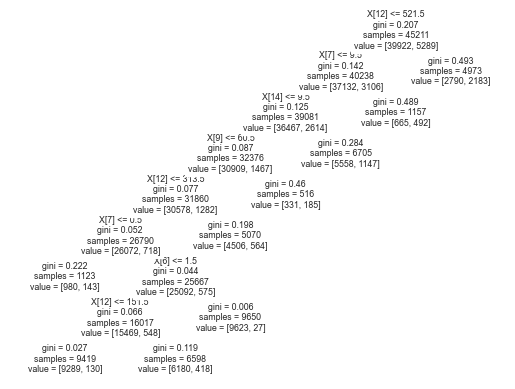

In [80]:
tree.plot_tree(clf)

## Question 3 Evaluating the Model

In [81]:
# Using metric from sklearn to evaluate the model
from sklearn import metrics

In [82]:
#Accuracy score
metrics.accuracy_score(y_test,y_test_pre)

0.8838880902355413

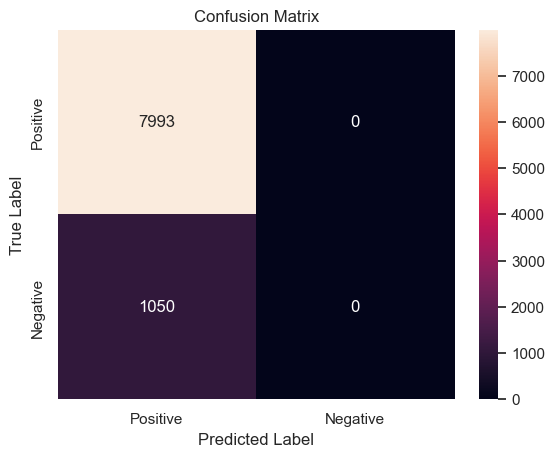

In [83]:
# Confusion matrix
cm = metrics.confusion_matrix(y_test,y_test_pre)
class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [84]:
#Recall Score
metrics.recall_score(y_test,y_test_pre)


0.0

In [85]:
# Precision Score
metrics.precision_score(y_test,y_test_pre)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

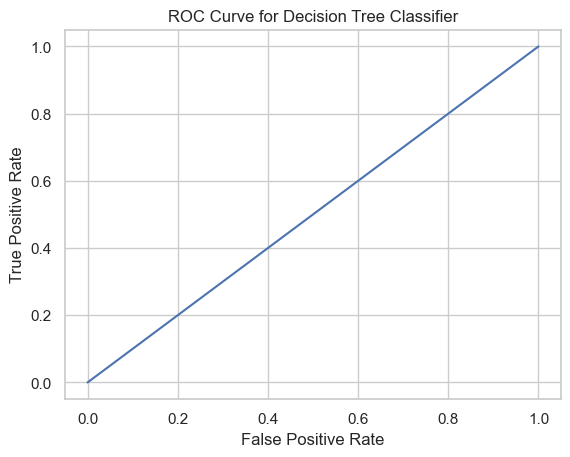

In [86]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pre)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.show()


In [87]:
from sklearn.metrics import roc_curve, auc

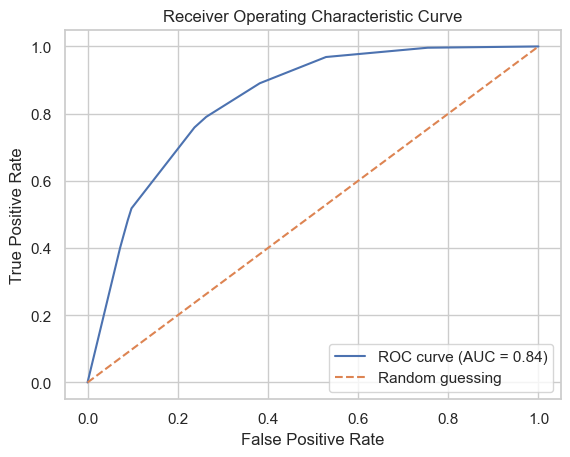

In [88]:
# AOC Curve
y_score = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)


plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.show()

## Prediction Model

In [89]:
def findout(a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p):
    x = clf.predict([[a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p]])
    return x

In [90]:
findout(4,1,2,0,1,0,2,8,3,58,2143,5,261,1,-1,0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

![](https://media.tenor.com/IAUvvrUY7zQAAAAM/done-spongebob.gif)